In [8]:
import pandas as pd                       #import all libraries#
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [2]:
referrals_df=pd.read_csv('../datasets/NHS_manual_data_cleaned_reformat.csv')
mood_df=pd.read_csv('../datasets/popular_tracks_and_moods.csv')
referrals_df.head()


mood_df = mood_df.loc[:, ['date','position','title','mood']]    #drop all columns except date , position and mood
mood_df['positivity']=mood_df['mood']
mood_df['average positivity']=""

mood_df['positivity']=np.where((mood_df['positivity']=='happy') | (mood_df['positivity']== 'calm'),100,0) #convert positive moods to numbers, if not pos parse as 0




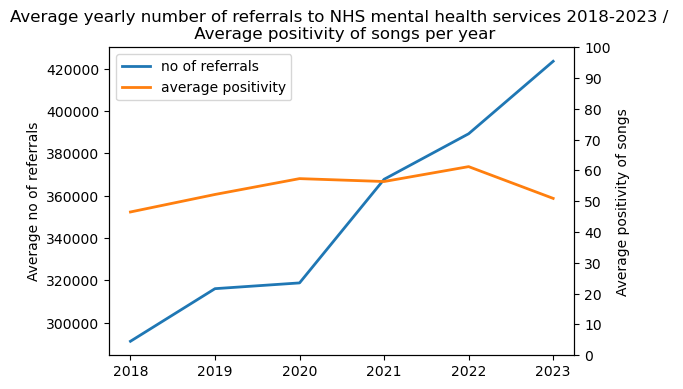

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
                                                
mood_df['year']=mood_df['date'].str[0:4]
mood_df_avg=mood_df.groupby('year')['positivity'].mean()      #make mood df a dataframe#
mood_df_avg = mood_df_avg.to_frame().reset_index()

percentage=[0,10,20,30,40,50,60,70,80,90,100]          #percentage for y axis 2 #

years=mood_df_avg['year']

fig, ax1 = plt.subplots(figsize=(6, 4))

referrals_dfgb=referrals_df.groupby('year')['no_of_referrals'].mean()
lns1=ax1.plot(years, referrals_dfgb,color='tab:blue',label='no of referrals',linewidth=2)

ax2 = ax1.twinx()

lns2=ax2.plot(years,mood_df_avg['positivity'],color='tab:orange',label='average positivity',linewidth=2)
ax2.set_ylim([0,100])

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

plt.yticks(np.arange(0,110, step=10))
plt.title(f'Average yearly number of referrals to NHS mental health services 2018-2023 / \n Average positivity of songs per year')

ax1.set_ylabel('Average no of referrals')
ax2.set_ylabel('Average positivity of songs')
#referrals_avg.plot(x = years,y = avg_referrals, ax=ax)
#referrals_avg.plot(x = years, y = percentage, ax = ax, secondary_y = True) 
plt.show()

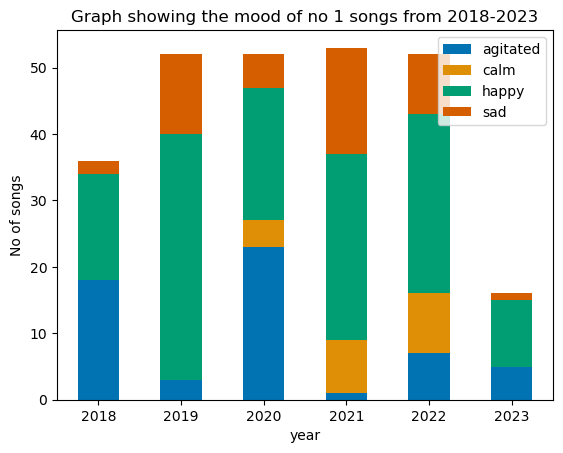

In [34]:
#want to plot no of happy songs that were no 1 each year# 

mood_df_position = mood_df.loc[:, ['position','title','mood']] 

mood_df_position['year']=mood_df['date'].str[0:4]
mood_df_position=mood_df_position[(((mood_df_position['mood']=='happy')|(mood_df_position['mood']=='sad')|(mood_df_position['mood']=='agitated')|(mood_df_position['mood']=='calm'))
                                   &(mood_df_position['position']==1))]
sns.set_palette("colorblind")
mood_df_position.groupby('year')['mood'].value_counts().unstack().plot(kind='bar',stacked=True)


plt.xticks(rotation=360)
plt.ylabel('No of songs')
plt.title("Graph showing the mood of no 1 songs from 2018-2023")
plt.legend(loc='upper right')


#mood_df_position


#mood_df_position_total = mood_df_position["agitated"] + mood_df_position["calm"] + mood_df_position["happy"]+mood_df_position["sad"]
#mood_df_rel = mood_df_position[mood_df_position.columns[1:]].div(mood_df_position_total, 0)*100
  
#for n in mood_df_rel:
#    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], mood_df_position[n], mood_df_rel[n])):
  #      plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%',va = 'center', ha = 'center')
#




#fig, ax = plt.subplots(figsize=(12, 8))
#x = mood_df_position['year']
#bar_width = 0.4
#b1 = ax.bar(x, mood_df_position.loc[mood_df_position['mood'] == 'agitated',''],
#            width=bar_width)
#b2 = ax.bar(x + bar_width, df.loc[mood_df_position['mood'] == 'calm'],
            #width=bar_width)

# Fix the x-axes.
#ax.set_xticks(x + bar_width / 2)
#ax.set_xticklabels(df.job.unique())


plt.show()